# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

### 구독자 분석
#### 구독율 필터링
구독 기간이 14개월 이상인 사용자만 필터링
* 구독율이 60%인 경우
* 구독율이 60%이하인 경우


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("C:/workspace/python/WASSUP4/05_Data_Analysis/data/mini.csv")

In [5]:
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [6]:
data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [8]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


### 데이터 전처리
* 구독기간데이터
* 월별평균학습일
* 결제패턴

In [10]:
# 결측치 확인하기
data.isnull().sum()

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

### 데이터 탐색 및 가설 검증에 맞는 데이터 처리하기
- 고수준자기주도학습자(구독기간 60%이상, 최근 2,3개월 결제이력, 월간활동일수가18일이상인 유저)의 완료 코스 수가 높을 것이다.

In [12]:
#구독기간 14개월 이상인 데이터 정리
vipuser_data = data[data['subscription_duration'] >= 14 ]

구독율 계산
* 구독 기간이 14개월 이상인 사용자만 필터링
    * 구독율이 60%인 경우
    * 구독율이 60%이하인 경우

In [14]:
# 구독연장여부
sub_counts = vipuser_data['target'].value_counts(normalize=True)

#구독률 60% 이상 및 이하
high_subscription = vipuser_data[vipuser_data['target'] ==1 ]
low_subscription = vipuser_data[vipuser_data['target'] ==0 ]

print(f'구독율: {sub_counts}')
print(f'구독율 60% 이상: {len(high_subscription)}, 이하: {len(low_subscription)}')

구독율: target
1    0.61869
0    0.38131
Name: proportion, dtype: float64
구독율 60% 이상: 2635, 이하: 1624


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import koreanize_matplotlib

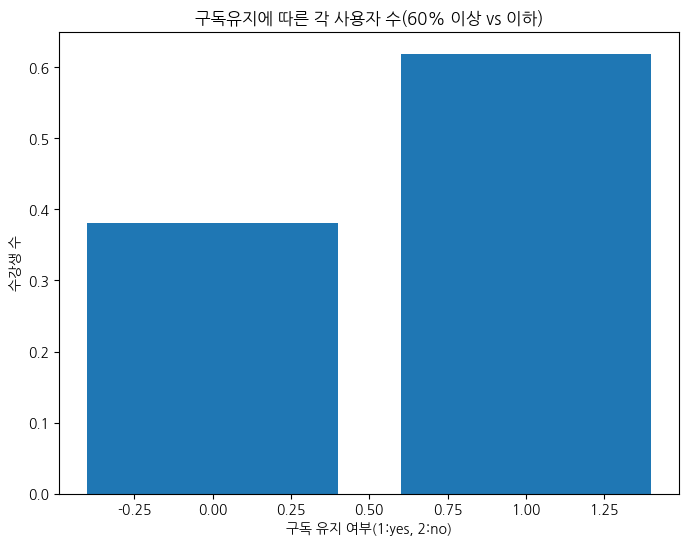

In [16]:
# 바그래프 그리기 
# 구독 유지여부에 따른 사용자 수(60%이상, 60%이하)비교

#plt.figure(width, height) 
plt.figure(figsize=(8,6))

#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
#plt.bar(X축값, Y축값)
plt.bar(sub_counts.index , sub_counts.values)
# plt.bar(access_media.index, access_media.values, color = ['gold', 'b', '#FF0000', 'green','orange','red','#000000'], alpha = 0.3)

#그래프의 제목
plt.title('구독유지에 따른 각 사용자 수(60% 이상 vs 이하)')

#그래프의 x축 라벨 이름
plt.xlabel('구독 유지 여부(1:yes, 2:no)')

#그래프의 y축 라벨 이름
plt.ylabel('수강생 수')

#x축 눈금의 글씨의 각도 변경을 위해 plt.xticks(rotation="원하는 각도")를 이용해요!
#x축 눈금의 글씨를 45도 회전
# plt.xticks(rotation=45)

#그래프를 화면에 나타나도록 합니다.
plt.show()

In [17]:
# 구독기간이 14개월이상인데 최근 3개월 결제이력이 없는 유저?
# vipuser_payment_7_3

In [18]:
#구독유지자중에서 구독을 유지할 가능성이 높은 사람을 결제패턴기준으로 정함. 3개월 결제이력있거나(7), 직전 2개월 결제(3)

In [19]:
vipuser_payment_7_3 = vipuser_data[vipuser_data['payment_pattern'].isin([7,3])]
print(vipuser_payment_7_3)

       user_id  subscription_duration  recent_login_time  average_login_time  \
2     b9f171ae                     22                  1           16.195228   
9     0eac44aa                     22                  8           10.545536   
24    69d99a48                     20                 25           16.443162   
26    9c9e76a1                     20                  5           13.839495   
70    40d3fca0                     19                 28           14.105771   
...        ...                    ...                ...                 ...   
9931  982ca1c0                     23                 21           18.121018   
9938  065d8979                     14                 18            9.820772   
9976  2602b60e                     23                  4           15.201025   
9983  f2757504                     22                 23           16.739713   
9992  5bb80449                     19                  4           13.105111   

      average_time_per_learning_session

In [119]:
# 구독 기간을 구간으로 나누기 (0-6개월, 6-12개월, 12-24개월 등)
data['subscription_group'] = pd.cut(data['subscription_duration'], 
                                    bins=[0, 6, 12, 24, 36], 
                                    labels=['0-6 months', '6-12 months', '12-24 months', '24-36 months'])

# 결과 확인
print(data[['subscription_duration', 'subscription_group']].head())

   subscription_duration subscription_group
0                     13       12-24 months
1                     16       12-24 months
2                     22       12-24 months
3                      1         0-6 months
4                      4         0-6 months


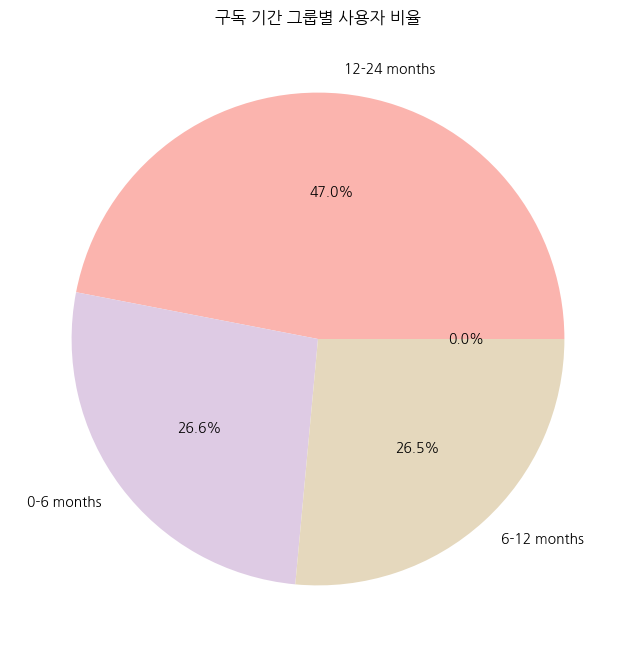

In [121]:
subscription_group_counts = data['subscription_group'].value_counts()
subscription_group_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='Pastel1')
plt.title('구독 기간 그룹별 사용자 비율')
plt.ylabel('')  # y축 라벨 제거
plt.show()

In [20]:
# 결제 패턴별 사용자 수 계산
payment_pattern_counts = vipuser_data['payment_pattern'].value_counts()
print(payment_pattern_counts)

payment_pattern
1    560
7    550
3    544
6    542
0    541
5    517
4    515
2    490
Name: count, dtype: int64


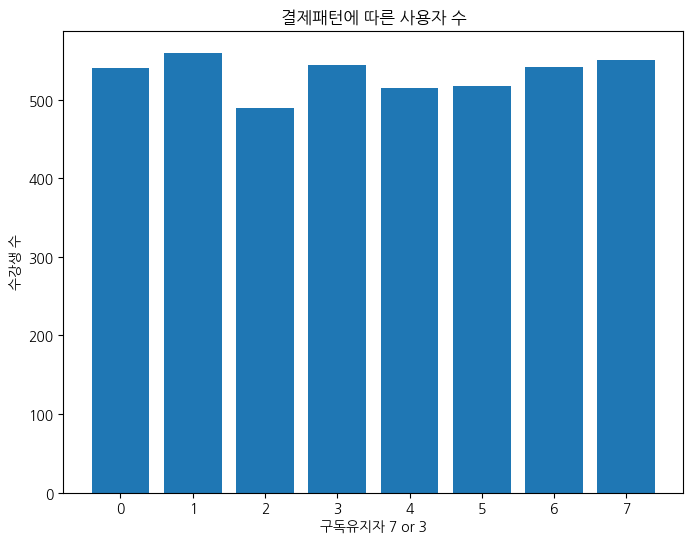

In [21]:
# 바그래프 그리기 

#plt.figure(width, height) 
plt.figure(figsize=(8,6))

#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
#plt.bar(X축값, Y축값)
plt.bar(payment_pattern_counts.index , payment_pattern_counts.values)
# plt.bar(access_media.index, access_media.values, color = ['gold', 'b', '#FF0000', 'green','orange','red','#000000'], alpha = 0.3)

#그래프의 제목
plt.title('결제패턴에 따른 사용자 수')

#그래프의 x축 라벨 이름
plt.xlabel('구독유지자 7 or 3')

#그래프의 y축 라벨 이름
plt.ylabel('수강생 수')

#x축 눈금의 글씨의 각도 변경을 위해 plt.xticks(rotation="원하는 각도")를 이용해요!
#x축 눈금의 글씨를 45도 회전
# plt.xticks(rotation=45)

#그래프를 화면에 나타나도록 합니다.
plt.show()

In [22]:
# 고수준자기주도학습자정의
proactive_learners = data[
    (data['subscription_duration'] >= 14) &
    (data['monthly_active_learning_days'] >= 18) &
    (data['payment_pattern'].isin([7,3]))
]

In [113]:
# 고수준자기주도학습자 수 출력
proactive_learners_count = proactive_learners.shape[0]
total_users = vipuser_payment_7_3.shape[0]
proactive_learners_percentage = proactive_learners_count/total_users *100
print("고수준자기주도학습자 수:", proactive_learners_count)
print("고수준자기주도학습자 비율:", proactive_learners_percentage)

고수준자기주도학습자 수: 313
고수준자기주도학습자 비율: 28.610603290676416


In [24]:
# 완료한 코스 수, 커뮤니티 참여도
mean_completed_courses_proactivelearners = proactive_learners['total_completed_courses'].mean()
mean_engagement_proactivelearners = proactive_learners['community_engagement_level'].mean()

In [25]:
print("고수준자기주도학습자의 평균 완료 코스 수:", mean_completed_courses_proactivelearners)
print("고수준자기주도학습자의 평균 커뮤니티 참여도:", mean_engagement_proactivelearners)

고수준자기주도학습자의 평균 완료 코스 수: 11.977635782747603
고수준자기주도학습자의 평균 커뮤니티 참여도: 3.7891373801916934


In [26]:
## 커뮤니티 참여도는 평균이하이고 코스 수는 전체 평균 수준이다. 전체 평균을 봐야할까?
## 아니다. 나의 데이터 기준은 구독 기간이 14개월 이상인 사람과 결제이력7,3인 유저이다. 그럼?

In [27]:
mean_completed_courses_vipusers = vipuser_payment_7_3['total_completed_courses'].mean()
mean_engagement_vipusers = vipuser_payment_7_3['community_engagement_level'].mean()

In [28]:
print("구독유지자들의 평균 완료 코스 수:", mean_completed_courses_vipusers)
print("구독유지자들의 평균 커뮤니티 참여도:", mean_engagement_vipusers)

구독유지자들의 평균 완료 코스 수: 12.158135283363803
구독유지자들의 평균 커뮤니티 참여도: 3.8409506398537476


In [29]:
mean_recent_learning_achievment_pro = proactive_learners['recent_learning_achievement'].mean()
print("고수준자기주도학습자들의 평균 학습성취도:", mean_recent_learning_achievment_pro)

고수준자기주도학습자들의 평균 학습성취도: 74.25403544508148


In [30]:
mean_recent_learning_achievment_vipuser = vipuser_payment_7_3['recent_learning_achievement'].mean()
print("구독유지자들의 평균 학습성취도:", mean_recent_learning_achievment_vipuser)

구독유지자들의 평균 학습성취도: 74.47934753419308


In [31]:
len(vipuser_payment_7_3)

1094

In [32]:
len(proactive_learners)

313

In [33]:
mean_learning_time_pro =proactive_learners['average_time_per_learning_session'].mean()
mean_learning_time_vipusers = vipuser_payment_7_3['average_time_per_learning_session'].mean()
print("고수준자기주도학습자들의 평균 학습 세션 시간:", mean_learning_time_pro)
print("구독유지자들의 평균 학습 세션 시간:", mean_learning_time_vipusers)

고수준자기주도학습자들의 평균 학습 세션 시간: 52.633239166372995
구독유지자들의 평균 학습 세션 시간: 53.11042057699411


In [34]:
import pandas as pd

In [35]:
# 중수준 자기주도 학습자 정의
medium_learners = data.query(
    'subscription_duration >= 10 and subscription_duration < 14 and monthly_active_learning_days >= 12 and payment_pattern in [7, 3, 6]'
).loc[
    ~data['user_id'].isin(proactive_learners['user_id'])  # 고수준자 제외
]

In [36]:
# 저수준 자기주도 학습자 정의
low_learners = data.query(
    'subscription_duration < 10 and monthly_active_learning_days < 12 and payment_pattern in [2, 1, 0]'
).loc[
    ~data['user_id'].isin(proactive_learners['user_id']) &  # 고수준자 제외
    ~data['user_id'].isin(medium_learners['user_id'])  # 중수준자 제외
]

In [37]:
# 각 그룹의 평균 학습 세션 시간과 성취도 계산
def compute_average_metrics(group):
    avg_session_time = group['average_time_per_learning_session'].mean()
    avg_achievement = group['recent_learning_achievement'].mean()
    return avg_session_time, avg_achievement

In [38]:
# 결과 저장
results = {
    "고수준 자기주도 학습자": compute_average_metrics(proactive_learners),
    "중수준 자기주도 학습자": compute_average_metrics(medium_learners),
    "저수준 자기주도 학습자": compute_average_metrics(low_learners),
    "구독 유지자": compute_average_metrics(vipuser_data),
}

# 결과 출력
for category, metrics in results.items():
    print(f"{category} 평균 학습 세션 시간: {metrics[0]}, 평균 학습 성취도: {metrics[1]}")

고수준 자기주도 학습자 평균 학습 세션 시간: 52.633239166372995, 평균 학습 성취도: 74.25403544508148
중수준 자기주도 학습자 평균 학습 세션 시간: 58.647378344491564, 평균 학습 성취도: 75.48497764311105
저수준 자기주도 학습자 평균 학습 세션 시간: 52.66125270295721, 평균 학습 성취도: 75.33235269176208
구독 유지자 평균 학습 세션 시간: 54.666724169456856, 평균 학습 성취도: 75.05774182866556


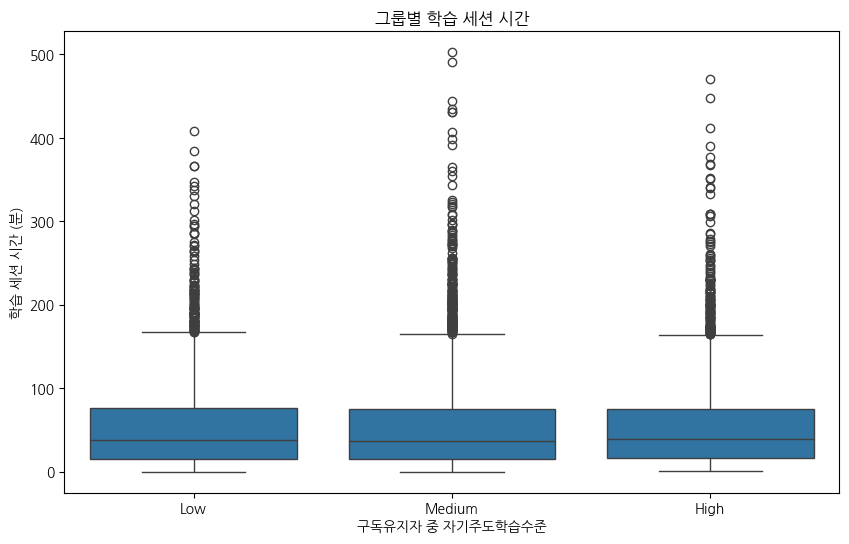

In [39]:
# 그룹별 학습 세션 시간 
# 그룹 생성
data['viplearners_level'] = pd.cut(data['monthly_active_learning_days'], 
                                      bins=[1, 7, 18, 30], 
                                      labels=['Low', 'Medium', 'High'])

# 박스 플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='viplearners_level', y='average_time_per_learning_session', data=data)
plt.title('그룹별 학습 세션 시간')
plt.xlabel('구독유지자 중 자기주도학습수준')
plt.ylabel('학습 세션 시간 (분)')
plt.show()

### 피봇테이블생성

In [41]:
# 각 그룹의 평균 학습 세션 시간과 평균 학습 성취도를 저장할 데이터프레임 생성
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['average_session_time', 'average_achievement'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'learner_category'}, inplace=True)

# 피봇 테이블 생성
pivot_table = results_df.pivot_table(
    index='learner_category', 
    values=['average_session_time', 'average_achievement'], 
    aggfunc='mean'
)

# 결과 출력
print(pivot_table)

                  average_achievement  average_session_time
learner_category                                           
고수준 자기주도 학습자                74.254035             52.633239
구독 유지자                      75.057742             54.666724
저수준 자기주도 학습자                75.332353             52.661253
중수준 자기주도 학습자                75.484978             58.647378


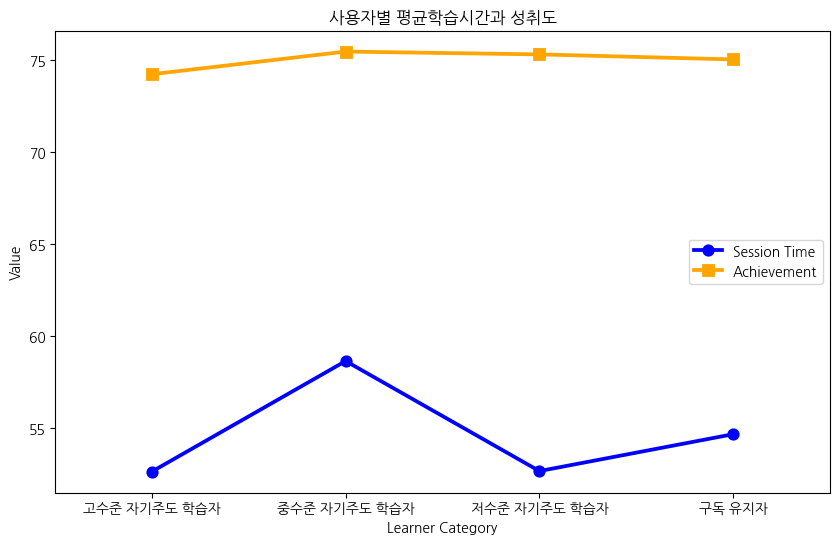

In [42]:
plt.figure(figsize=(10,6))

sns.pointplot(data=results_df, x='learner_category', y='average_session_time', marker='o', color='blue', label='Session Time')
sns.pointplot(data=results_df, x='learner_category', y='average_achievement', marker='s', color='orange', label='Achievement')

plt.title('사용자별 평균학습시간과 성취도')
plt.ylabel('Value')
plt.xlabel('Learner Category')
plt.legend()
plt.show() 

저수준은 구독기간이 상대적으로 짧으니까 session time이 당연히 낫지 않을까? 
```
그럼 seesion time과 mean.course를 분석할 때 구독 기간과의 상관관계를 함께 검토하면?
구독 기간에 비례한 상대적 코스 완료 수를 평가하면 어떨까?

In [44]:
# 구독 기간에 따라 그룹화하고 평균 학습 세션 시간 계산
avg_time_per_session_by_subscription_low = low_learners.groupby('subscription_duration')['average_time_per_learning_session'].mean()

# 결과 출력
print("구독 기간에 따른 저수준 학습자의 평균 학습 세션 시간:")
print(avg_time_per_session_by_subscription_low)

구독 기간에 따른 저수준 학습자의 평균 학습 세션 시간:
subscription_duration
1    49.478272
2    53.180759
3    51.477852
4    56.335084
5    51.516497
6    51.543883
7    56.271045
8    56.613923
9    49.183517
Name: average_time_per_learning_session, dtype: float64


In [45]:
vipuser_payment_7_3

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1
24,69d99a48,20,25,16.443162,21.318411,2,15,85.927671,4,5,Low,Premium,4,3,1
26,9c9e76a1,20,5,13.839495,6.181276,3,13,94.271652,3,3,Low,Basic,0,3,1
70,40d3fca0,19,28,14.105771,5.339600,7,11,76.940895,2,4,High,Premium,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,982ca1c0,23,21,18.121018,30.359489,17,10,72.870869,6,4,High,Basic,1,7,1
9938,065d8979,14,18,9.820772,197.018715,14,12,68.036611,1,3,Low,Basic,4,7,1
9976,2602b60e,23,4,15.201025,0.058419,6,10,70.459241,4,5,Low,Premium,4,7,1
9983,f2757504,22,23,16.739713,6.047050,15,9,64.817228,4,5,Medium,Basic,2,3,0


In [46]:
# 구독유지자의 구독 기간에 따른 평균 학습 세션 시간
# 구독 기간에 따라 그룹화하고 평균 학습 세션 시간 계산
avg_time_per_session_by_subscription_vipusers = vipuser_payment_7_3.groupby('subscription_duration')['average_time_per_learning_session'].mean()

# 결과 출력
print("구독 기간에 따른 수준별 학습자의 평균 학습 세션 시간:")
print(avg_time_per_session_by_subscription_vipusers)

구독 기간에 따른 수준별 학습자의 평균 학습 세션 시간:
subscription_duration
14    54.574449
15    41.304421
16    57.912781
17    58.957787
18    60.226636
19    57.179351
20    52.270589
21    53.985463
22    51.065604
23    43.316721
Name: average_time_per_learning_session, dtype: float64


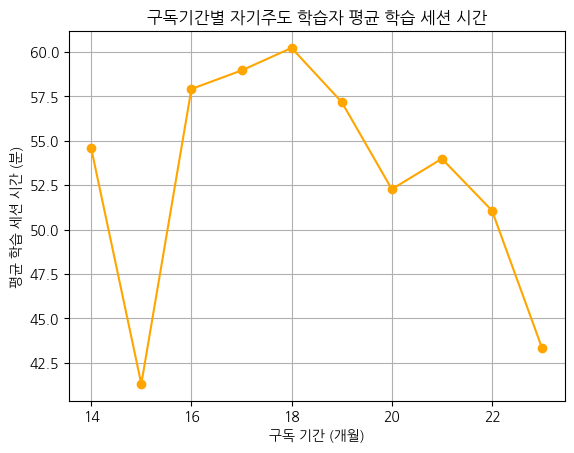

In [47]:
# 선 그래프
avg_time_per_session_by_subscription_vipusers.plot(kind='line', marker='o', color='orange')
plt.title('구독기간별 자기주도 학습자 평균 학습 세션 시간')
plt.xlabel('구독 기간 (개월)')
plt.ylabel('평균 학습 세션 시간 (분)')
plt.grid()
plt.show()

In [48]:
# 15개월차와 24개월차가 가장 낮다.
# 18개월차가 가장 높다. 그 이유는? 
# 구독이 쭉 이어져 왔는지는 모르겠지만 최근 3개월과 직전 2개월은 꾸준히 구독을 유지함.

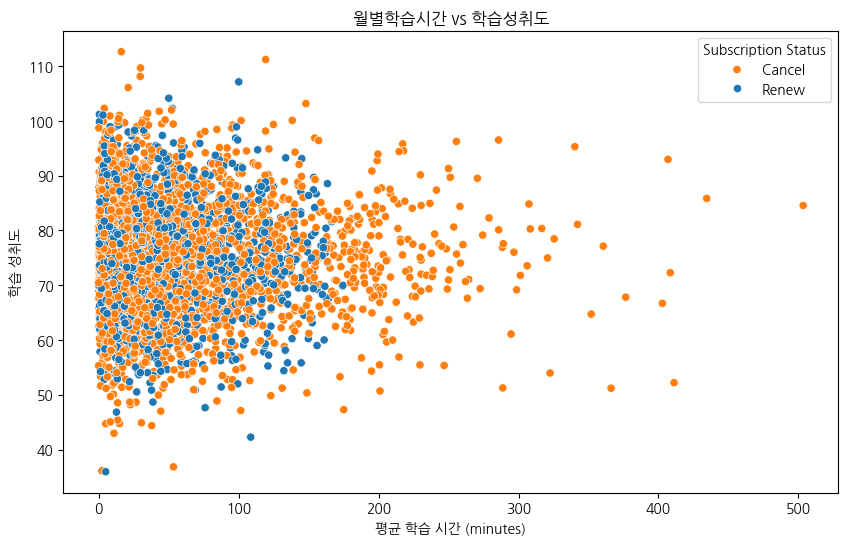

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_time_per_learning_session', y='recent_learning_achievement', hue='target', data=vipuser_data)
plt.title('월별학습시간 vs 학습성취도')
plt.xlabel('평균 학습 시간 (minutes)')
plt.ylabel('학습 성취도')
plt.legend(title='Subscription Status', labels=['Cancel', 'Renew'])
plt.show()

### 분석 결과 및 인사이트 도출